In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
def unnormalized_posterior(x):
    return (
        sts.norm.pdf(x, loc=-4, scale=0.5) +
        sts.norm.pdf(x, loc=4, scale=1)
    )

In [3]:
def proposal_dist_rvs(x_0, eps):
    return sts.norm(loc=x_0, scale=eps).rvs()

In [4]:
NUM_ITER = 1000
EPS = [0.5, 1, 2, 4]
prev = 0
cur = 0

samples = {}
accept_count = {}
reject_count = {}

for eps in EPS:
    accept_count['eps={}'.format(eps)] = 0
    reject_count['eps={}'.format(eps)] = 0
    samples['eps={}'.format(eps)] = []
    
    for i in range(NUM_ITER):
        cur = proposal_dist_rvs(prev, eps)
        ratio = unnormalized_posterior(cur) / unnormalized_posterior(prev)

        if ratio >= 1:
            samples['eps={}'.format(eps)].append(cur) # accept
            accept_count['eps={}'.format(eps)] += 1
            prev = cur
        else:
            acceptance = sts.bernoulli(ratio).rvs()
            
            if acceptance == 1:
                samples['eps={}'.format(eps)].append(cur)
                accept_count['eps={}'.format(eps)] += 1
                prev = cur
            else:
                samples['eps={}'.format(eps)].append(prev)
                reject_count['eps={}'.format(eps)] += 1

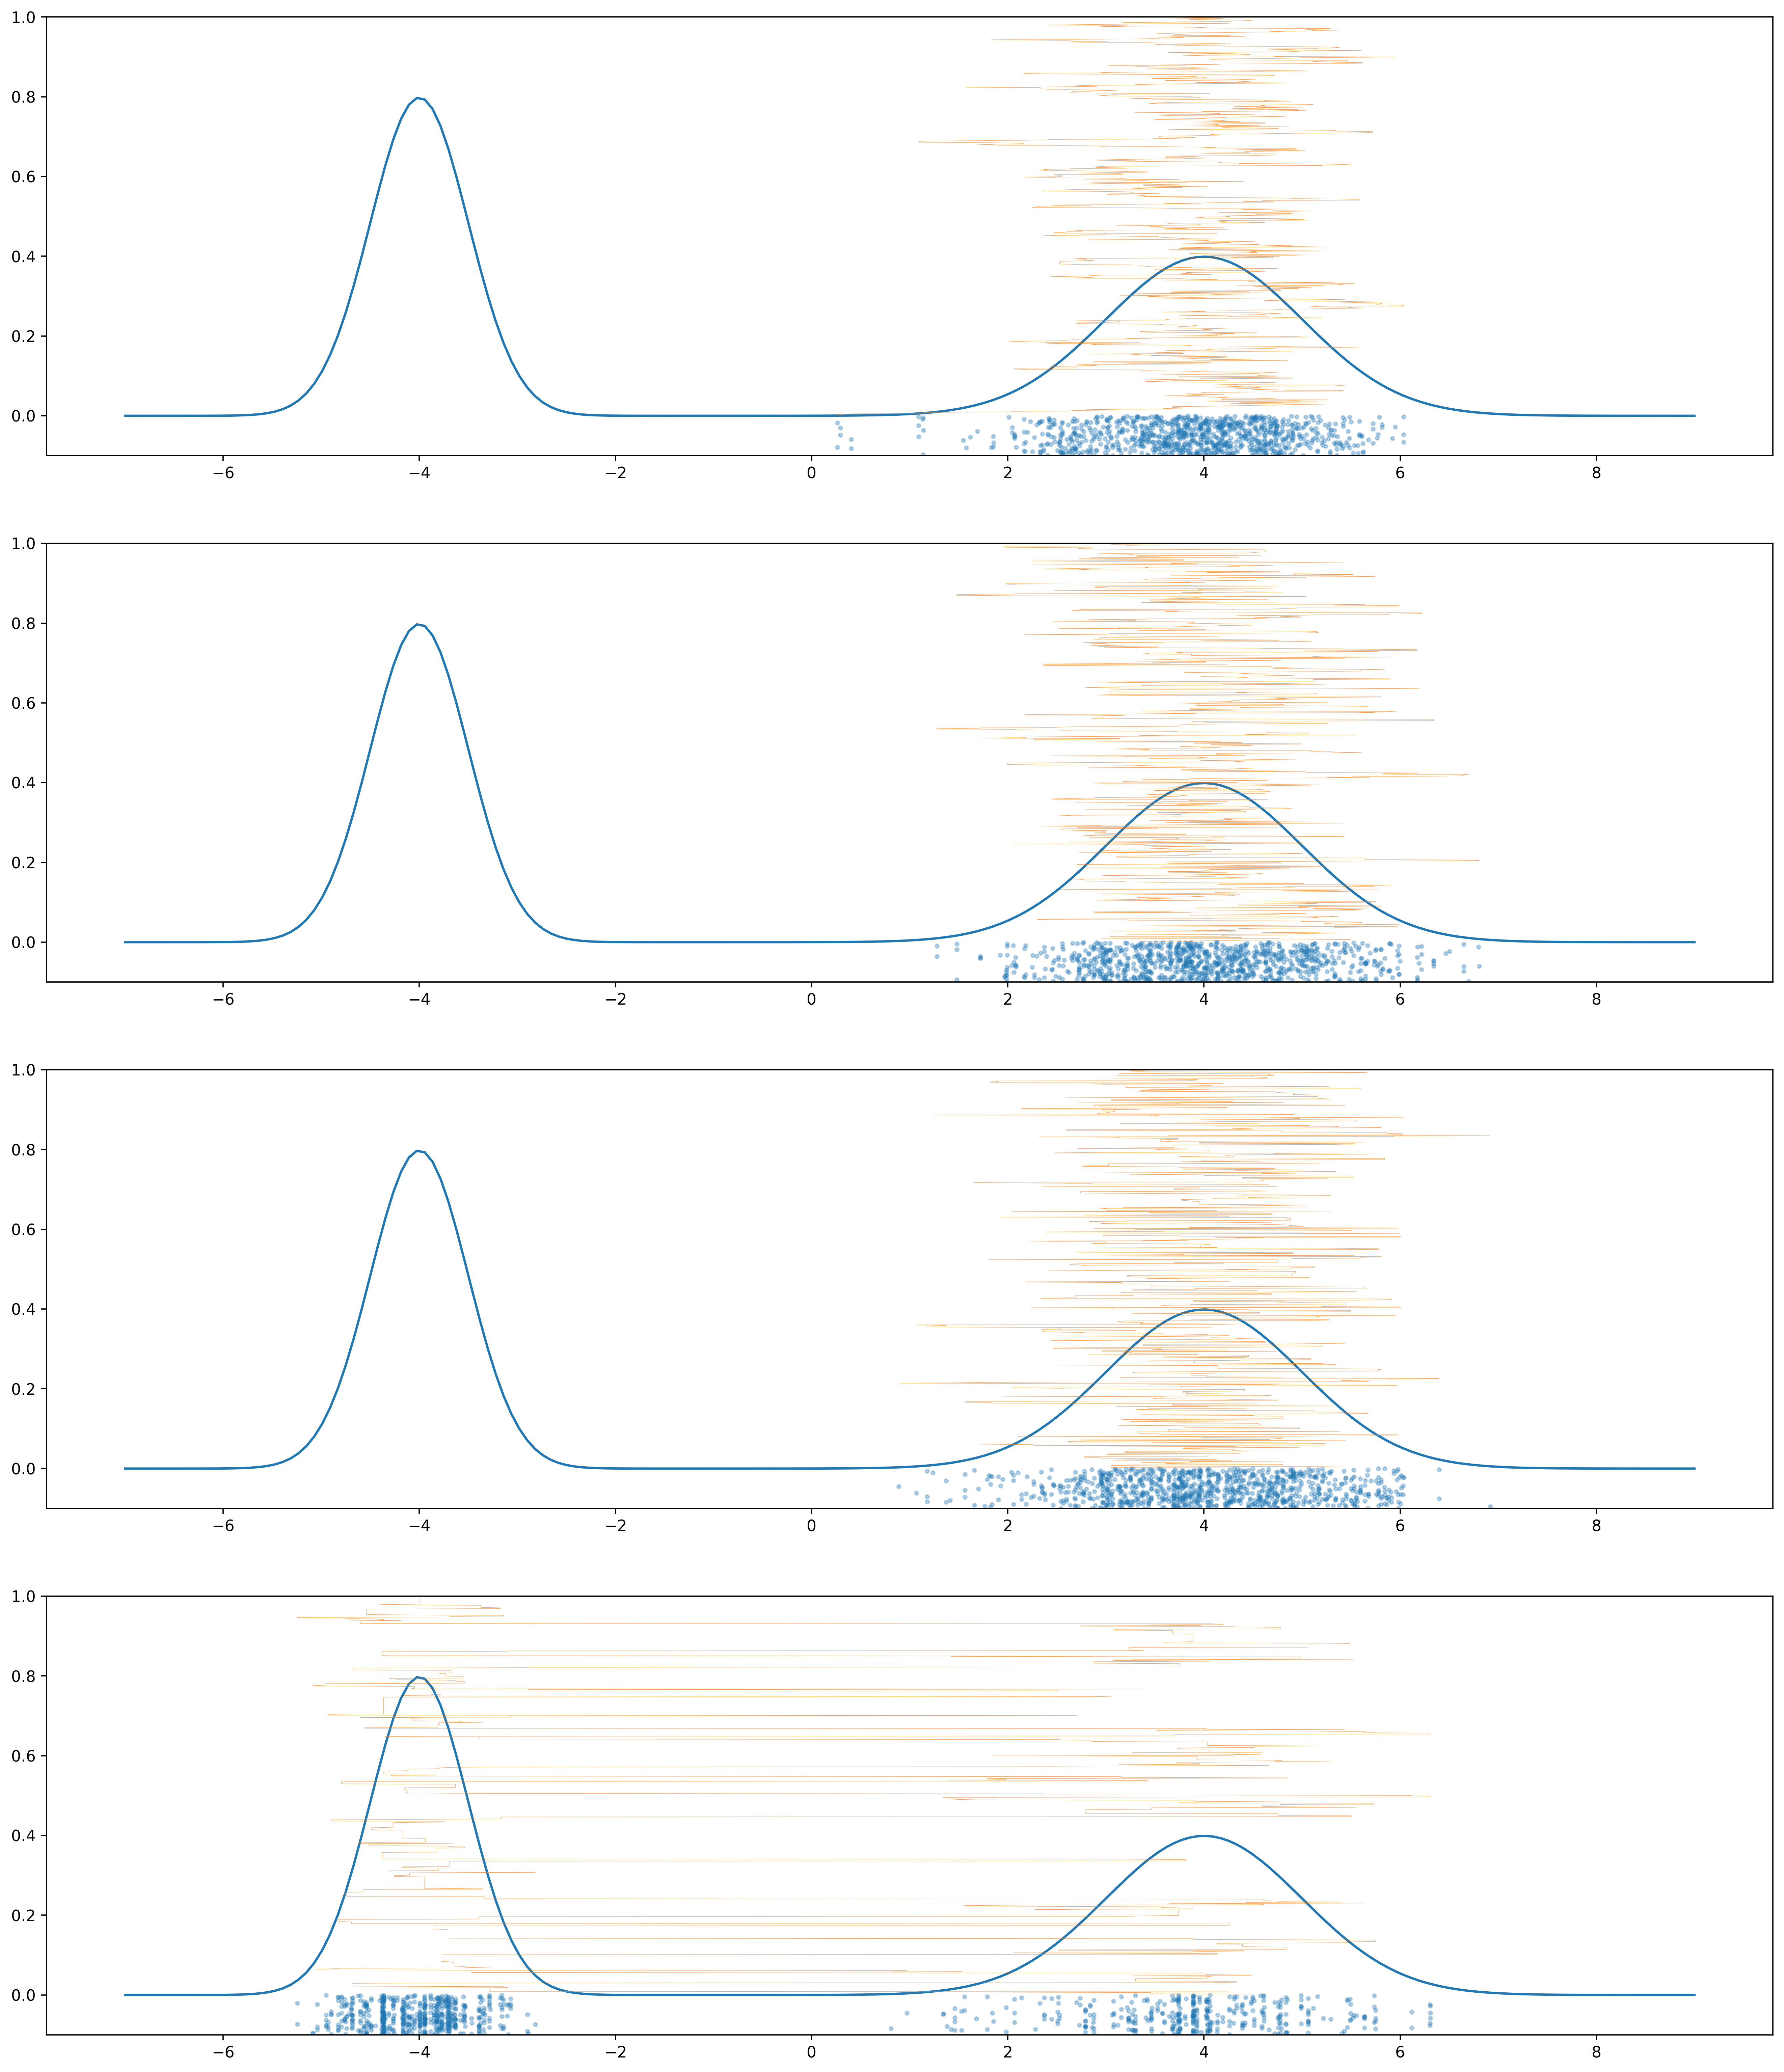

In [5]:
plt.figure(figsize=(20, 24), dpi=330)

x = np.linspace(-7, 9, 200)
y = [] # the unnormalized posterior distribution
for val in x:
    y.append(unnormalized_posterior(val))
    
y_step = np.linspace(0, 1, NUM_ITER)

for i, eps in enumerate(EPS):
    samp = samples['eps={}'.format(eps)]
    plt.subplot(4, 1, i + 1)
    plt.plot(x, y)
    
    plt.scatter(samp, np.random.uniform(low=-0.1, high=0, size=len(samp)), s=5, alpha=0.3)
    plt.plot(samp, y_step, linewidth=0.2, alpha=0.8)
    
    plt.ylim(-0.1, 1.0)
    
plt.show()

### What is the acceptance rate?


In [6]:
for i, eps in enumerate(EPS):
    print('For eps={0}, acceptance rate is {1}'.format(
        eps,
        accept_count['eps={}'.format(eps)] / (accept_count['eps={}'.format(eps)] + reject_count['eps={}'.format(eps)]))
    )

For eps=0.5, acceptance rate is 0.851
For eps=1, acceptance rate is 0.722
For eps=2, acceptance rate is 0.51
For eps=4, acceptance rate is 0.251


### How correlated are the samples?

In [7]:
def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal
    import matplotlib.pyplot as plt
    
    plt.acorr(
    x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

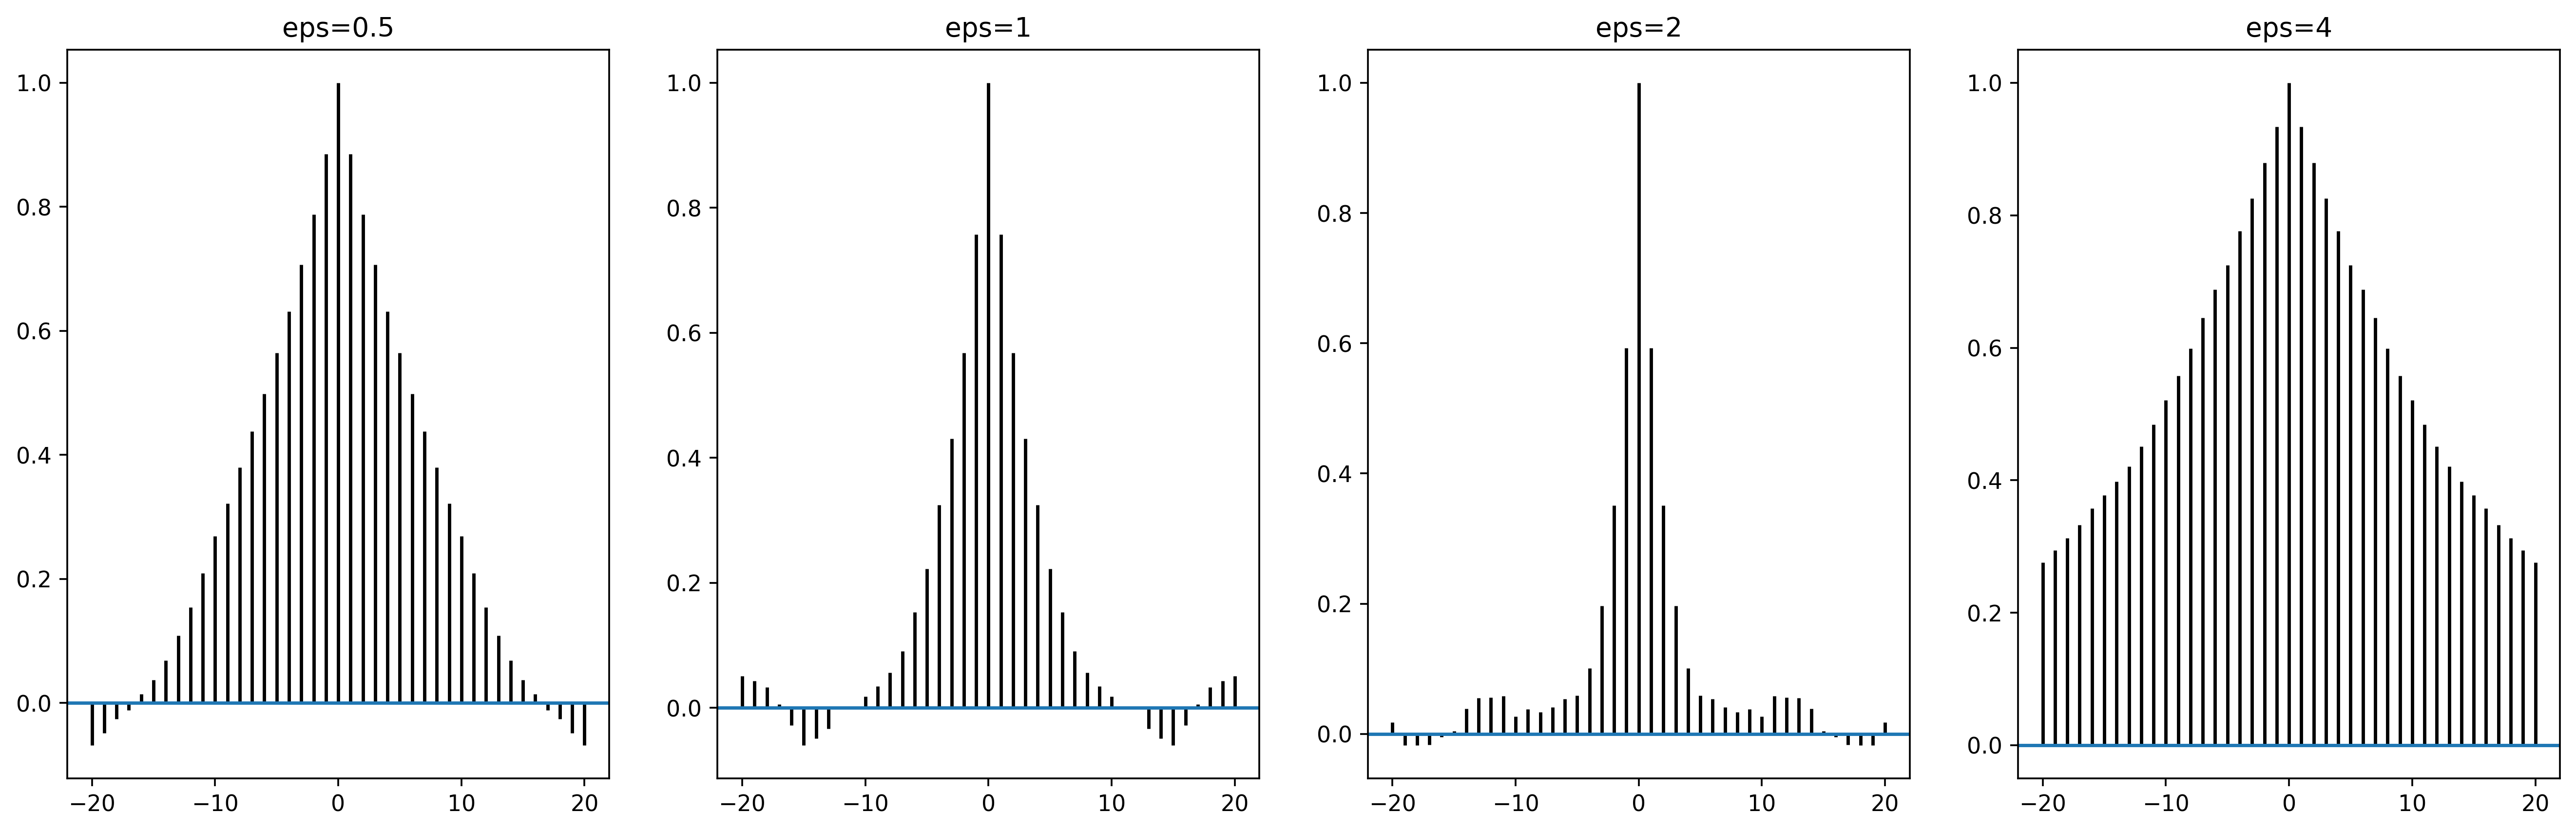

In [8]:
plt.figure(figsize=(20, 6), dpi=330)

for i, eps in enumerate(EPS):
    samp = samples['eps={}'.format(eps)]
    plt.subplot(1, 4, i + 1)
    plot_acf(samp)
    plt.title('eps={}'.format(eps))

plt.show()

### Which value of ε is the best?
Seems like $\epsilon=4$ was the best value as it sampled from both peaks and at the rates seemingly proportional to their respective volumes.